In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load IMDB dataset
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
#Displays first five records of data set
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
#Column types
df.dtypes

review       object
sentiment    object
dtype: object

In [5]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
#Statistical summary
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
#Number of rows and columns
df.shape

(50000, 2)

Percentage distribution of review by sentiment

positive    50.0
negative    50.0
Name: sentiment, dtype: float64


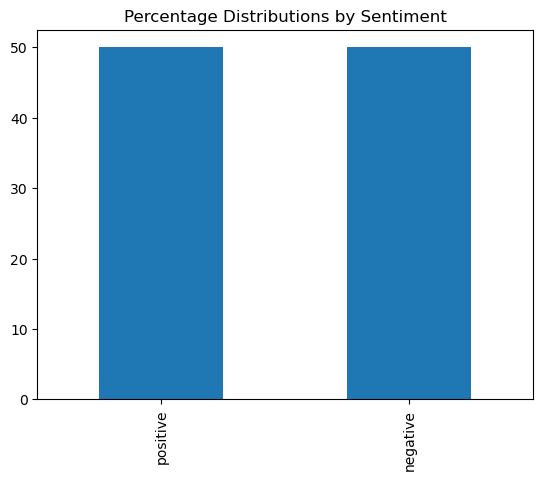

In [8]:
#Looking at distribution
%matplotlib inline
print('Percentage distribution of review by sentiment\n')
print(round(df.sentiment.value_counts(normalize=True)*100,2))
round(df.sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by Sentiment')
plt.show()

In [9]:
#Converting word to lowercase
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

#Tokenizes the text
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [10]:
#Import libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.util import ngrams

#Removing html
df['review'] = df['review'].apply(lambda x: x.replace('<br />', ''))
df['sentiment'].replace(['negative', 'positive'], [0, 1], inplace=True)

#Removing punctuations and tokenizing
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['review'].apply(tokenizer.tokenize)

# Removing stop words
stopwords = stopwords.words('english')
df['tokens'] = df['tokens'].apply(lambda x: [w.lower() for w in x if w.lower() not in stopwords])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yskk9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


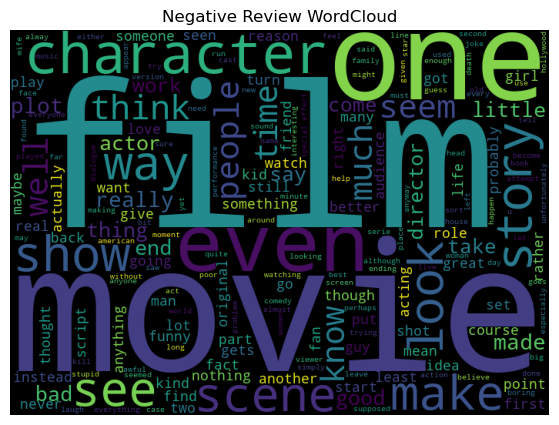

In [11]:
#Import libraries and install pip
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

#Negative review WordCloud
rvw_tokens = ''
for tokens in df[df['sentiment'] == 0]['tokens']:
    rvw_tokens += " ".join(tokens)
    
wordcloud = WordCloud(width=700, height=500).generate(rvw_tokens)

plt.figure(figsize = (8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Negative Review WordCloud')
plt.show()

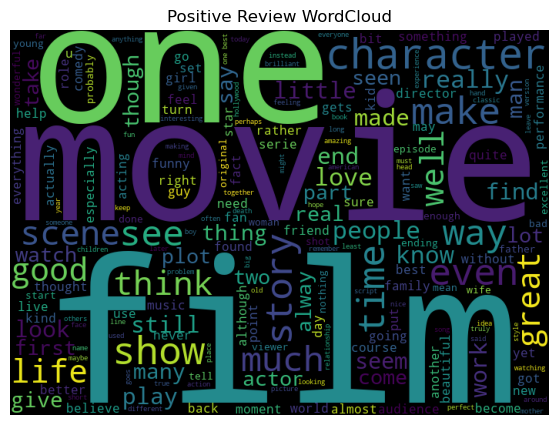

In [12]:
#Positive review WordCloud
rvw_tokens = ''
for tokens in df[df['sentiment'] == 1]['tokens']:
    rvw_tokens += " ".join(tokens)
    
wordcloud = WordCloud(width=700, height=500).generate(rvw_tokens)

plt.figure(figsize = (8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Positive Review WordCloud')
plt.show()

In [13]:
#Specifies the length of n-grams to be extracted
def extract_ngrams(tokens, num):
    n_grams = ngrams(tokens, num)
    n_grams = [ ' '.join(grams) for grams in n_grams]
    return n_grams

#Specifies the length of n-grams to be counted
def count_ngrams(df, num):
    gram_dict = {}
    for i in df:
        grams = extract_ngrams(i, num)
        for j in grams:
            if j in gram_dict:
                gram_dict[j] += 1
            else:
                gram_dict[j] = 1
    gram_dict = dict(sorted(gram_dict.items(), key=lambda item: item[1], reverse=True))
    return gram_dict

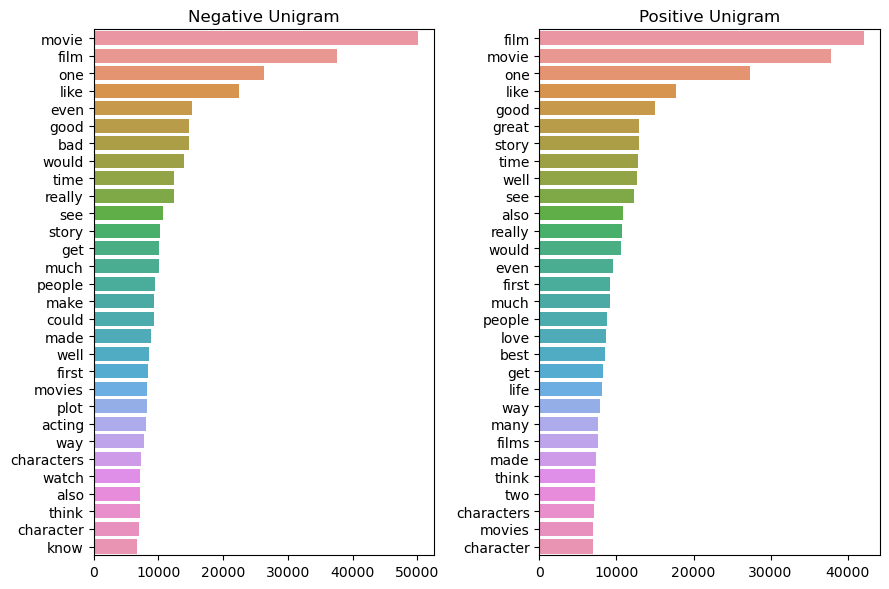

In [14]:
#Counts of unigrams for the sentiment reviews in the 'tokens' column of the DataFrame
nug = count_ngrams(df[df['sentiment']==0]['tokens'], 1)
pug = count_ngrams(df[df['sentiment']==1]['tokens'], 1)

fig, axes = plt.subplots(1, 2, figsize=(9,6))
num = 30
sns.barplot(x=list(nug.values())[:num], y=list(nug.keys())[:num], ax=axes[0])
sns.barplot(x=list(pug.values())[:num], y=list(pug.keys())[:num], ax=axes[1])

axes[0].set_title('Negative Unigram')
axes[1].set_title('Positive Unigram')

plt.tight_layout()
plt.show()

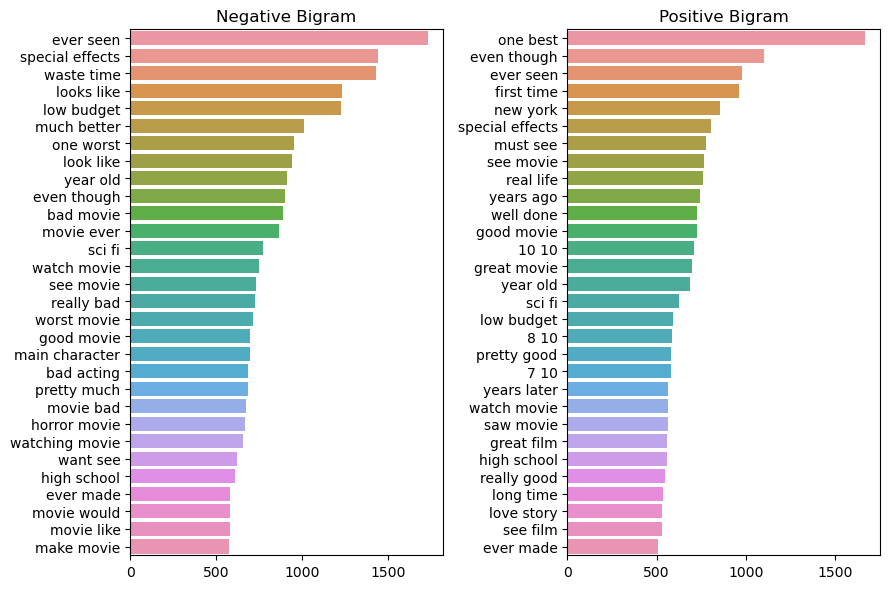

In [15]:
##Counts of bigrams for the sentiment reviews in the 'tokens' column of the DataFrame
nbg = count_ngrams(df[df['sentiment']==0]['tokens'], 2)
pbg = count_ngrams(df[df['sentiment']==1]['tokens'], 2)

fig, axes = plt.subplots(1, 2, figsize=(9,6))
num = 30
sns.barplot(x=list(nbg.values())[:num], y=list(nbg.keys())[:num], ax=axes[0])
sns.barplot(x=list(pbg.values())[:num], y=list(pbg.keys())[:num], ax=axes[1])

axes[0].set_title('Negative Bigram')
axes[1].set_title('Positive Bigram')

plt.tight_layout()
plt.show()

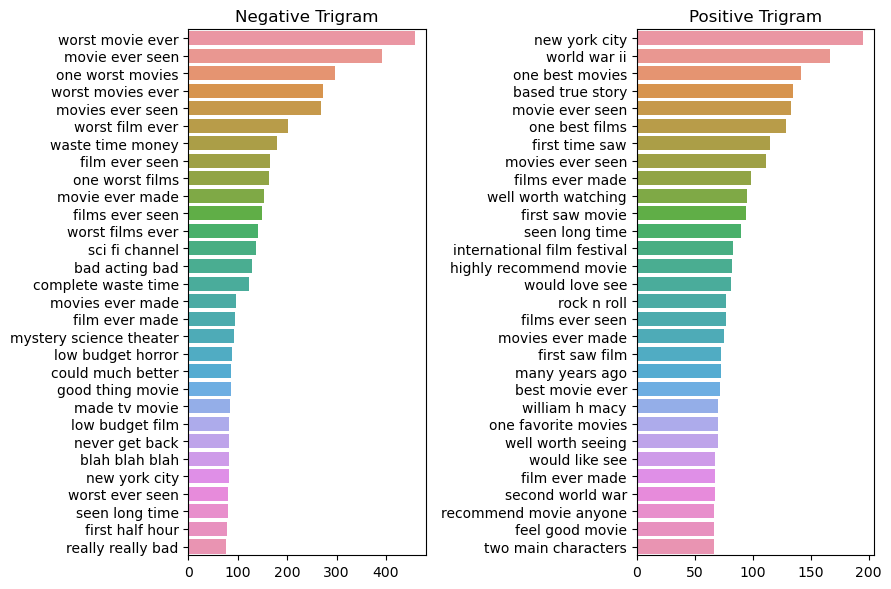

In [16]:
#Counts of trigrams for the sentiment reviews in the 'tokens' column of the DataFrame
ntg = count_ngrams(df[df['sentiment']==0]['tokens'], 3)
ptg = count_ngrams(df[df['sentiment']==1]['tokens'], 3)

fig, axes = plt.subplots(1, 2, figsize=(9,6))
num = 30
sns.barplot(x=list(ntg.values())[:num], y=list(ntg.keys())[:num], ax=axes[0])
sns.barplot(x=list(ptg.values())[:num], y=list(ptg.keys())[:num], ax=axes[1])

axes[0].set_title('Negative Trigram')
axes[1].set_title('Positive Trigram')

plt.tight_layout()
plt.show()

In [17]:
#Generation of 10 sets of training and testing samples where each fold maintains the class distribution of the original dataset
from sklearn.model_selection import StratifiedKFold
X = df['review']
y = df['sentiment']

kfold = StratifiedKFold(n_splits=10)
for i, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

In [18]:
%%time

#LDA

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Defining the number of topics for LDA
num_topics = 10

pipeline_lda = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2), min_df=0.0001)),
    ('lda', LatentDirichletAllocation(n_components=num_topics)),
])

# Fitting the pipeline to training data
pipeline_lda.fit(X_train)

# Getting the topic distribution
document_topic_distribution = pipeline_lda.transform(X_train[0:1])

# Printing the dominant topic
dominant_topic = document_topic_distribution.argmax()
print(f"Dominant topic: {dominant_topic}")

# Printing the top words
vectorizer = pipeline_lda.named_steps['tfidf']
lda_model = pipeline_lda.named_steps['lda']
feature_names = vectorizer.get_feature_names_out()
top_words = lda_model.components_[dominant_topic].argsort()[:-11:-1]
print("Top words:")
for word_index in top_words:
    print(feature_names[word_index])

Dominant topic: 6
Top words:
movie
film
like
just
good
really
time
story
bad
great
Wall time: 4min 52s


In [19]:
%%time

#Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", LogisticRegression()),
])

pipeline_lr.fit(X_train, y_train)
print(f'train score: {pipeline_lr.score(X_train, y_train)}')
print(f'test score: {pipeline_lr.score(X_test, y_test)}')

train score: 0.9444
test score: 0.8994
Wall time: 1min 15s


In [20]:
#An assessment of the model's performance in terms of both overall accuracy and class-specific metrics
from sklearn.metrics import classification_report, f1_score

y_pred = pipeline_lr.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      2500
    Positive       0.89      0.91      0.90      2500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

F1 Score:  0.9000993048659384


In [25]:
%%time

#Random Forest

from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", RandomForestClassifier()),
])

pipeline_rf.fit(X_train, y_train)
print(f'train score: {pipeline_rf.score(X_train, y_train)}')
print(f'test score: {pipeline_rf.score(X_test, y_test)}')

train score: 1.0
test score: 0.87
Wall time: 4min 13s


In [22]:
#An assessment of the model's performance in terms of both overall accuracy and class-specific metrics
y_pred = pipeline_rf.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.87      0.87      2500
    Positive       0.87      0.86      0.87      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

F1 Score:  0.8651685393258427


In [26]:
%%time

#KNN

from sklearn.neighbors import KNeighborsClassifier

pipeline_kn = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", KNeighborsClassifier()),
])

pipeline_kn.fit(X_train, y_train)
print(f'train score: {pipeline_kn.score(X_train, y_train)}')
print(f'test score: {pipeline_kn.score(X_test, y_test)}')

train score: 0.8574666666666667
test score: 0.774
Wall time: 3min 58s


In [27]:
#An assessment of the model's performance in terms of both overall accuracy and class-specific metrics
y_pred = pipeline_kn.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.70      0.76      2500
    Positive       0.74      0.84      0.79      2500

    accuracy                           0.77      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.77      0.77      5000

F1 Score:  0.7887060583395661


In [28]:
%%time

#Decision Tree

from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", DecisionTreeClassifier()),
])

pipeline_dt.fit(X_train, y_train)
print(f'train score: {pipeline_dt.score(X_train, y_train)}')
print(f'test score: {pipeline_dt.score(X_test, y_test)}')

train score: 1.0
test score: 0.722
Wall time: 2min 34s


In [29]:
#An assessment of the model's performance in terms of both overall accuracy and class-specific metrics
y_pred = pipeline_dt.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.73      0.72      2500
    Positive       0.73      0.71      0.72      2500

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000

F1 Score:  0.7194186515946709


In [30]:
%%time

#Logistic Regression is used as it has one of the highest accuracies and shortest training time

from sklearn.model_selection import GridSearchCV

pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.0001)),
    ("classifier", LogisticRegression()),
])

param = {'classifier__penalty' : ['l2'],
         'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'classifier__max_iter': [10000]}  # we increase max_iter to avoid convergence error

gridsearch_lr = GridSearchCV(pipeline_lr, param, cv=5, verbose=3)
best_model = gridsearch_lr.fit(X_train,y_train)

print(f'train score: {best_model.score(X_train, y_train)}')
print(f'test score: {best_model.score(X_test, y_test)}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END classifier__C=0.001, classifier__max_iter=10000, classifier__penalty=l2;, score=0.820 total time=  36.5s
[CV 2/5] END classifier__C=0.001, classifier__max_iter=10000, classifier__penalty=l2;, score=0.822 total time=  16.0s
[CV 3/5] END classifier__C=0.001, classifier__max_iter=10000, classifier__penalty=l2;, score=0.818 total time=  16.8s
[CV 4/5] END classifier__C=0.001, classifier__max_iter=10000, classifier__penalty=l2;, score=0.814 total time=  16.4s
[CV 5/5] END classifier__C=0.001, classifier__max_iter=10000, classifier__penalty=l2;, score=0.819 total time=  19.6s
[CV 1/5] END classifier__C=0.01, classifier__max_iter=10000, classifier__penalty=l2;, score=0.828 total time=  16.9s
[CV 2/5] END classifier__C=0.01, classifier__max_iter=10000, classifier__penalty=l2;, score=0.830 total time=  17.1s
[CV 3/5] END classifier__C=0.01, classifier__max_iter=10000, classifier__penalty=l2;, score=0.827 total time=  15.7s

In [31]:
#An assessment of the model's performance in terms of both overall accuracy and class-specific metrics
y_pred = best_model.predict(X_test)
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print('F1 Score: ', f1_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.90      0.91      2500
    Positive       0.90      0.91      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000

F1 Score:  0.9057884231536927
